# Final EDA to investigate the Business (Use-)Case

In [58]:
import numpy as np
import pandas as pd
import os
import glob

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# WordCloud
from wordcloud import WordCloud

# Global plot modification
%matplotlib inline
sns.set_theme(style="whitegrid")
sns.set_palette('rainbow')

#sns.set_theme(style="ticks", palette="pastel")

In [41]:
# Read data set
df = pd.read_csv('data/Kickstarter_cleaned2.csv')

# Drop column
df = df.drop(['Unnamed: 0'], axis=1)

# Show head
df.head(2)

,backers_count,id,usd_pledged,category_name,category_id,category_parent_id,usd_goal,duration_days,duration_days_prep,year_deadline,...,spring_deadline_True,summer_deadline_True,deadline_weekend_True,launched_weekend_True,country_US_True,eastcoast_True,long_blurb_True,long_name_True,state_b_True,long_creator_name_True
0,47,928751314,1950.0,Playing Cards,273,12.0,1000.0,30.0,8.0,2017,...,0,0,1,0,1,0,1,0,1,0
1,271,928014092,22404.0,Rock,43,14.0,15000.0,30.0,225.0,2013,...,0,1,0,0,1,0,0,1,1,0


In [4]:
# Define decimal places shown
pd.options.display.float_format = '{:,.2f}'.format

In [5]:
#df.shape
#df.info()
#df.isnull().sum().sort_values(ascending=False)

### Heatmap

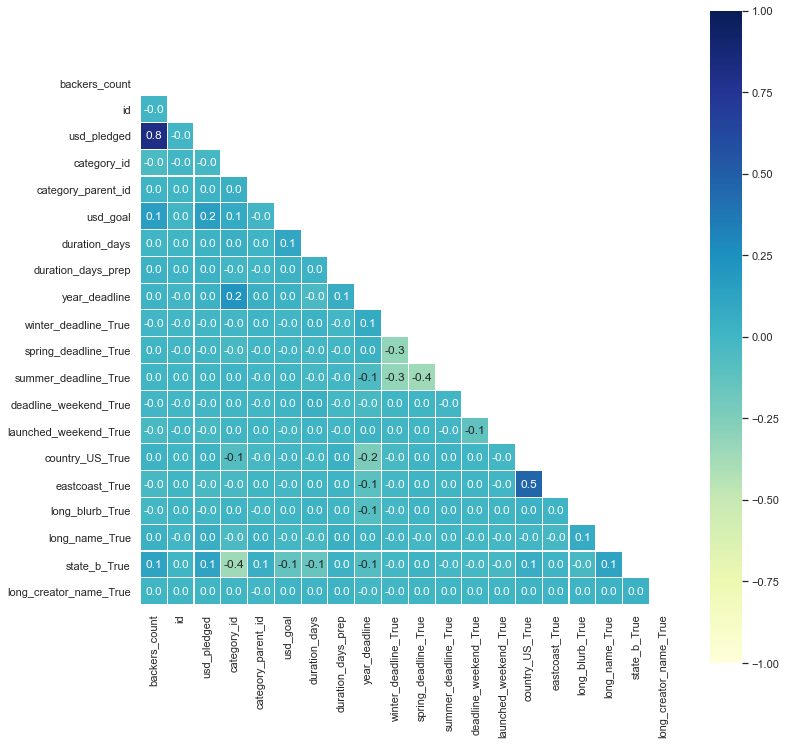

In [7]:
# Calculate correlations
corr = df.corr()

# Plot heatmap
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(corr, mask=mask, vmax=1, center=0, vmin=-1,
                     square=True, annot=True, fmt='.1f', cmap='YlGnBu', linewidth=0.1);

### Wordcloud

In [45]:
# Read uncleaned data set
df2 = pd.read_csv('data/Kickstarter_cleaned1.csv')

# Drop column
df2 = df2.drop(['Unnamed: 0'], axis=1)

In [46]:
# Filter data regarding success and fail
success = df2[df2.state == 'successful']
failed = df2[df2.state == 'failed']

(-0.5, 399.5, 199.5, -0.5)

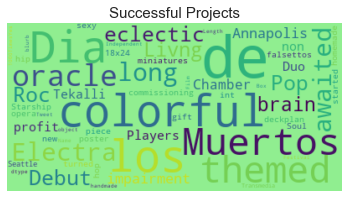

In [47]:
# Wordcloud of successful projects
text = str(success.blurb)

wordcloud = WordCloud(background_color="lightgreen").generate(text)

plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Successful Projects", fontsize=15)
plt.axis("off")
#plt.savefig('successful_projects.png')

(-0.5, 399.5, 199.5, -0.5)

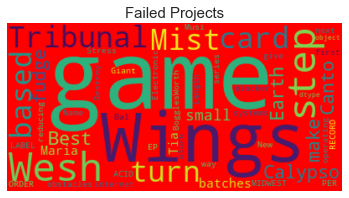

In [48]:
# Wordcloud of failed projects
text = str(failed.blurb)

wordcloud = WordCloud(background_color="red").generate(text)

plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Failed Projects", fontsize=15)
plt.axis("off")
#plt.savefig('failed_projects.png')

### 'State'

In [6]:
#df.state.unique()

Text(0.5, 0, 'Project state')

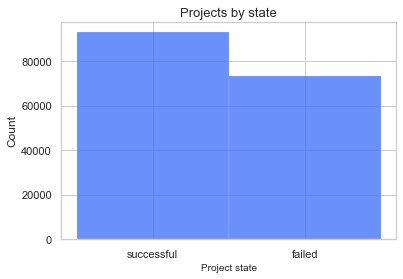

In [7]:
# Data selection
state = df.state

# Plotting
sns.histplot(state, linewidth=0.1);

# Formating
plt.title('Projects by state', fontsize=13)
plt.xlabel('Project state', fontsize=10)

### 'Category'

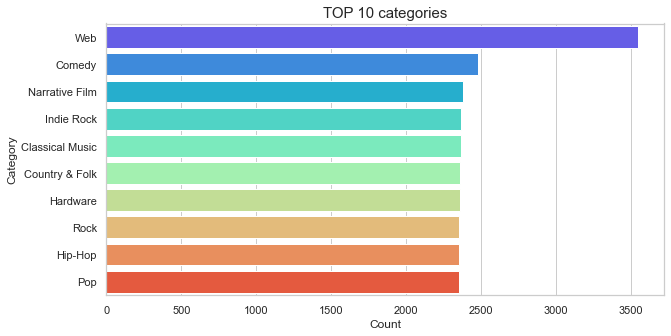

In [42]:
# Change dimension of the plot
fig, ax = plt.subplots(figsize=(10, 5))

# Plotting TOP 10
sns.countplot(y=df.category_name,
              order=df['category_name'].value_counts().sort_values(ascending=False).iloc[0:10].index,
             palette='rainbow');

# Formating
plt.title('TOP 10 categories', fontsize=15)
plt.xlabel('Count', fontsize = 12)
plt.ylabel('Category', fontsize = 12)
#plt.savefig('TOP10_categories.png')

### 'Goal' & 'Pledged Amount'

(0.0, 17500.0)

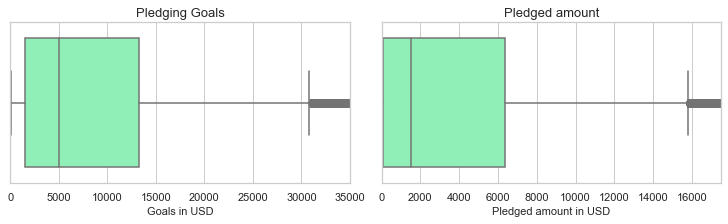

In [56]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 3), constrained_layout=True)

# Plotting & Formating
sns.boxplot(x=df.usd_goal, palette='rainbow', ax=ax[0]);
ax[0].set_title('Pledging Goals', fontsize=13)
ax[0].set_xlabel('Goals in USD', fontsize=11)
ax[0].set_xlim(0, 35000)

sns.boxplot(x=df.usd_pledged, palette='rainbow', ax=ax[1]);
ax[1].set_title('Pledged amount', fontsize=13)
ax[1].set_xlabel('Pledged amount in USD', fontsize=11)
ax[1].set_xlim(0, 17500)

#### Distribution

/Users/michaelleder/opt/anaconda3/envs/kickstarter/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Goal')

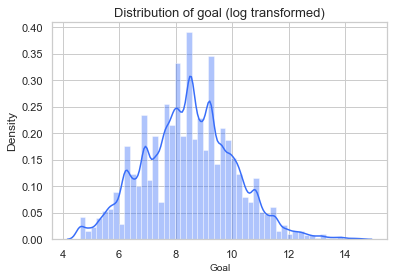

In [35]:
# Plotting
sns.distplot(a=df.usd_goal.apply(np.log));

# Formating
plt.title('Distribution of goal (log transformed)', fontsize=13)
plt.xlabel('Goal', fontsize=10)

/Users/michaelleder/opt/anaconda3/envs/kickstarter/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'usd_pledged')

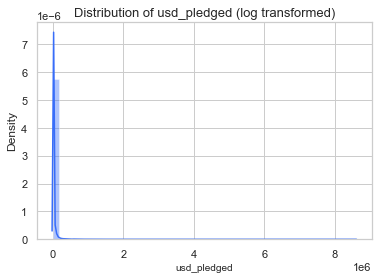

In [33]:
# Plotting
z = df.usd_pledged.astype(int)
sns.distplot(a=z);

# Formating
plt.title('Distribution of usd_pledged (log transformed)', fontsize=13)
plt.xlabel('usd_pledged', fontsize=10)
#plt.xscale('log')

### 'Country'

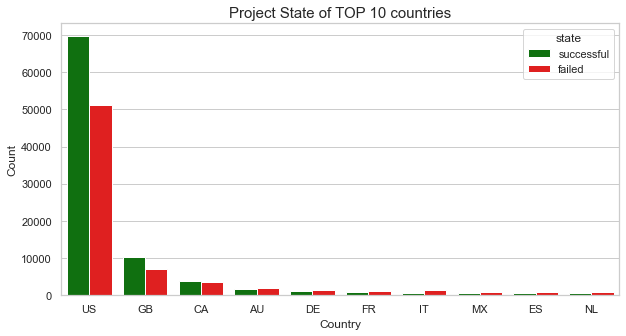

In [69]:
# Change dimension of the plot
fig, ax = plt.subplots(figsize=(10, 5))

# Create an array with the colors
colors = ['green', 'red']
colors2 = ['red', 'green']

# Set custom color palette
palette = sns.color_palette(colors)
palette2 = sns.color_palette(colors2)

# Plotting
sns.countplot(data=df2, x='country', order=df2['country'].value_counts().iloc[0:10].index,
              hue='state', palette=palette);

# Formating
plt.title('Project State of TOP 10 countries', fontsize=15)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.savefig('TOP10_countries.png')

In [61]:
df.columns

Index(['backers_count', 'id', 'usd_pledged', 'category_name', 'category_id',
       'category_parent_id', 'usd_goal', 'duration_days', 'duration_days_prep',
       'year_deadline', 'month_deadline', 'weekday_deadline',
       'weekday_launched_at', 'winter_deadline_True', 'spring_deadline_True',
       'summer_deadline_True', 'deadline_weekend_True',
       'launched_weekend_True', 'country_US_True', 'eastcoast_True',
       'long_blurb_True', 'long_name_True', 'state_b_True',
       'long_creator_name_True'],
      dtype='object')

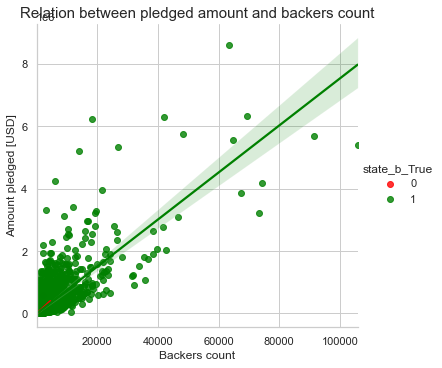

In [77]:
# Plotting & Formating
sns.lmplot(data=df, x='backers_count', y='usd_pledged', hue='state_b_True', palette=palette2);
plt.title('Relation between pledged amount and backers count', fontsize=15)
plt.xlabel('Backers count', fontsize=12)
plt.ylabel('Amount pledged [USD]', fontsize=12)
#plt.savefig('corr1.png')

Text(12.085, 0.5, 'Parent category')

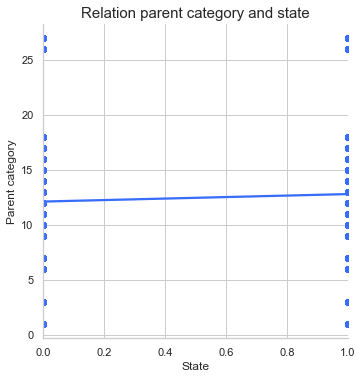

In [78]:
# Plotting & Formating
sns.lmplot(data=df, x='state_b_True', y='category_parent_id', palette='rainbow');
plt.title('Relation parent category and state', fontsize=15)
plt.xlabel('State', fontsize=12)
plt.ylabel('Parent category', fontsize=12)
#plt.savefig('corr2.png')